Week 5

In [1]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes
print("Libraries installed.")

Solving environment: done

# All requested packages already installed.

Libraries installed.


In [2]:
salvador = {'Bairros':['Barra, Salvador', 'Brotas, Salvador', 'Cajazeiras, Salvador', 'Caminho das arvores, Salvador', 'Comercio, Salvador', 'Graça, Salvador', 'Itaigara, Salvador', 'Itapoa, Salvador', 'Liberdade, Salvador', 'Ondina, Salvador', 'Pituba, Salvador', 'Rio vermelho, Salvador' ] }

In [3]:
df = pd.DataFrame(salvador)

In [4]:
print (df)

                          Bairros
0                 Barra, Salvador
1                Brotas, Salvador
2            Cajazeiras, Salvador
3   Caminho das arvores, Salvador
4              Comercio, Salvador
5                 Graça, Salvador
6              Itaigara, Salvador
7                Itapoa, Salvador
8             Liberdade, Salvador
9                Ondina, Salvador
10               Pituba, Salvador
11         Rio vermelho, Salvador


In [5]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



In [6]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="salvador_food")

df['Major_Dist_Coord']= df['Bairros'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Bairros,Latitude,Longitude
0,"Barra, Salvador",-12.999437,-38.518218
1,"Brotas, Salvador",-12.986140,-38.492384
2,"Cajazeiras, Salvador",-12.899938,-38.408157
3,"Caminho das arvores, Salvador",-12.982453,-38.458303
4,"Comercio, Salvador",-12.970068,-38.512473
5,"Graça, Salvador",-12.997703,-38.524663
6,"Itaigara, Salvador",-12.991887,-38.465944
7,"Itapoa, Salvador",-12.919344,-38.349614
8,"Liberdade, Salvador",-12.945203,-38.493752
9,"Ondina, Salvador",-13.007408,-38.511721


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [8]:
address = 'salvador bahia'

geolocator = Nominatim(user_agent="salvador_food")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Salvador are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Salvador are -12.9822499, -38.4812772.


In [9]:
# create map of Cologne using latitude and longitude 
map_salvador = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Bairros']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_salvador) 
    
map_salvador

In [10]:
CLIENT_ID = 'BKWFQMUBPFCHUDYKBEN2FEDANJ2E0GHDMYBFRC2ESVHVILUZ' # su ID de Foursquare
CLIENT_SECRET = 'YYX1G4VRROQY5UOOGYPTIOM35O5UGPZHLIIKN1AKMMEDLLRY' # su Secreto de Cliente de Foursquare
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKWFQMUBPFCHUDYKBEN2FEDANJ2E0GHDMYBFRC2ESVHVILUZ
CLIENT_SECRET:YYX1G4VRROQY5UOOGYPTIOM35O5UGPZHLIIKN1AKMMEDLLRY


In [11]:
df.loc[0, 'Bairros']

'Barra, Salvador'

In [12]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Bairros'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Barra, Salvador are -12.9994367, -38.518217711216224.


In [13]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BKWFQMUBPFCHUDYKBEN2FEDANJ2E0GHDMYBFRC2ESVHVILUZ&client_secret=YYX1G4VRROQY5UOOGYPTIOM35O5UGPZHLIIKN1AKMMEDLLRY&v=20180604&ll=-12.9994367,-38.518217711216224&radius=600&limit=15'

In [14]:
results = requests.get(url).json()

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [16]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Fino Abará,Dumpling Restaurant,-12.998558,-38.519243
1,Calzoneria 23,Pizza Place,-13.001864,-38.517851
2,Café Temaki,Japanese Restaurant,-12.997113,-38.519160
3,Frutas & Cia,Vegetarian / Vegan Restaurant,-13.000894,-38.517871
4,Deli & Cia,Deli / Bodega,-12.997862,-38.519402


In [17]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [18]:
print ('{} unique categories.'.format(nearby_venues['categories'].value_counts().shape[0]))

14 unique categories.


In [19]:
print (nearby_venues['categories'].value_counts()[0:15])

Pizza Place                      2
Jazz Club                        1
Indie Movie Theater              1
Portuguese Restaurant            1
Bakery                           1
Deli / Bodega                    1
Restaurant                       1
BBQ Joint                        1
Japanese Restaurant              1
Gym / Fitness Center             1
Athletics & Sports               1
Gym                              1
Vegetarian / Vegan Restaurant    1
Dumpling Restaurant              1
Name: categories, dtype: int64


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [21]:
salvador_venues = getNearbyVenues(names=df['Bairros'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Barra, Salvador
Brotas, Salvador
Cajazeiras, Salvador
Caminho das arvores, Salvador
Comercio, Salvador
Graça, Salvador
Itaigara, Salvador
Itapoa, Salvador
Liberdade, Salvador
Ondina, Salvador
Pituba, Salvador
Rio vermelho, Salvador


In [22]:
salvador_venues.shape

(1200, 7)

In [23]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
salvador_Venues_only_restaurant = salvador_venues[salvador_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
salvador_Venues_only_restaurant.index = np.arange(1, len(salvador_Venues_only_restaurant )+1)

In [24]:
print (salvador_Venues_only_restaurant['Venue Category'].value_counts())

Brazilian Restaurant             39
Restaurant                       39
Italian Restaurant               21
Baiano Restaurant                21
Seafood Restaurant               13
Japanese Restaurant              11
Fast Food Restaurant              9
Vegetarian / Vegan Restaurant     9
French Restaurant                 9
Mediterranean Restaurant          5
Dumpling Restaurant               4
Asian Restaurant                  4
Portuguese Restaurant             4
Spanish Restaurant                3
Indian Restaurant                 3
Tapas Restaurant                  3
Argentinian Restaurant            3
Sushi Restaurant                  3
Latin American Restaurant         3
German Restaurant                 3
Mineiro Restaurant                3
Chinese Restaurant                2
Middle Eastern Restaurant         2
Thai Restaurant                   1
Swiss Restaurant                  1
Vietnamese Restaurant             1
African Restaurant                1
Name: Venue Category, dtype:

In [25]:
print('There are {} unique categories.'.format(len(salvador_Venues_only_restaurant['Venue Category'].unique())))

There are 27 unique categories.


In [26]:
# create a dataframe of top 10 categories
salvador_Venues_Top10 = salvador_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
salvador_Venues_Top10=salvador_Venues_Top10.reset_index()
salvador_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
salvador_Venues_Top10

,Venue_Category,Frequency
0,Brazilian Restaurant,39
1,Restaurant,39
2,Italian Restaurant,21
3,Baiano Restaurant,21
4,Seafood Restaurant,13
5,Japanese Restaurant,11
6,Fast Food Restaurant,9
7,Vegetarian / Vegan Restaurant,9
8,French Restaurant,9
9,Mediterranean Restaurant,5


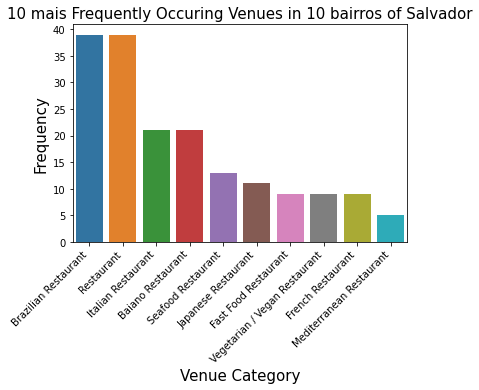

<Figure size 1296x504 with 0 Axes>

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=salvador_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 mais Frequently Occuring Venues in 10 bairros of Salvador', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [28]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", salvador_Venues_only_restaurant.shape)
salvador_Venues_only_restaurant.head(75)

Shape of the Data-Frame with Venue Category only Restaurant:  (220, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,"Barra, Salvador",-12.999437,-38.518218,Fino Abará,-12.998558,-38.519243,Dumpling Restaurant
2,"Barra, Salvador",-12.999437,-38.518218,Casa Lisboa,-13.004774,-38.517394,Portuguese Restaurant
3,"Barra, Salvador",-12.999437,-38.518218,Cantina Volpi,-13.005524,-38.518099,Italian Restaurant
4,"Barra, Salvador",-12.999437,-38.518218,Oliva Gourmet,-13.005930,-38.523613,Restaurant
5,"Barra, Salvador",-12.999437,-38.518218,Shiro,-12.997806,-38.526532,Japanese Restaurant
6,"Barra, Salvador",-12.999437,-38.518218,Tokai,-13.005962,-38.523589,Japanese Restaurant
7,"Barra, Salvador",-12.999437,-38.518218,Frutas & Cia,-13.000894,-38.517871,Vegetarian / Vegan Restaurant
8,"Barra, Salvador",-12.999437,-38.518218,Gattai Temaki & Rolls,-13.006635,-38.524452,Sushi Restaurant
9,"Barra, Salvador",-12.999437,-38.518218,Alfredo Di Roma,-13.008673,-38.515687,Italian Restaurant
10,"Barra, Salvador",-12.999437,-38.518218,Restaurante Taberna - Cocina Espanola,-13.007314,-38.519994,Spanish Restaurant


In [29]:
salvador_Venues_restaurant = salvador_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

In [30]:
salvador_Venues_restaurant

Neighborhood
Barra, Salvador                  20
Brotas, Salvador                 18
Cajazeiras, Salvador              7
Caminho das arvores, Salvador    20
Comercio, Salvador               18
Graça, Salvador                  25
Itaigara, Salvador               18
Itapoa, Salvador                 16
Liberdade, Salvador               9
Ondina, Salvador                 21
Pituba, Salvador                 23
Rio vermelho, Salvador           25
Name: Venue Category, dtype: int64

In [31]:
salvador_Venues_restaurant_df  = salvador_Venues_restaurant.to_frame().reset_index()
salvador_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
salvador_Venues_restaurant_df.index = np.arange(1, len(salvador_Venues_restaurant_df)+1)
list_rest_no =salvador_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =salvador_Venues_restaurant_df['Neighborhood'].to_list()

In [32]:
# one hot encoding
salvador_onehot = pd.get_dummies(salvador_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
salvador_onehot['Neighborhood'] = salvador_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [salvador_onehot.columns[-1]] + list(salvador_onehot.columns[:-1])
salvador_onehot = salvador_onehot[fixed_columns]

salvador_onehot.head()

,Neighborhood,African Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Brazilian Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,"Barra, Salvador",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Barra, Salvador",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,"Barra, Salvador",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Barra, Salvador",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,"Barra, Salvador",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
salvador_grouped = salvador_onehot.groupby('Neighborhood').mean().reset_index()
salvador_grouped

,Neighborhood,African Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Brazilian Restaurant,Chinese Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Portuguese Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,"Barra, Salvador",0.000000,0.000000,0.000000,0.000000,0.100000,0.0000,0.050000,0.000000,0.050000,0.050000,0.000000,0.150000,0.100000,0.000000,0.050000,0.05,0.000000,0.050000,0.150000,0.050000,0.050000,0.050000,0.00,0.000000,0.00,0.050000,0.000000
1,"Brotas, Salvador",0.000000,0.055556,0.000000,0.111111,0.166667,0.0000,0.000000,0.000000,0.111111,0.000000,0.055556,0.055556,0.055556,0.000000,0.055556,0.00,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.00,0.055556,0.00,0.055556,0.000000
2,"Cajazeiras, Salvador",0.000000,0.000000,0.000000,0.000000,0.142857,0.0000,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
3,"Caminho das arvores, Salvador",0.000000,0.000000,0.000000,0.200000,0.150000,0.0000,0.050000,0.050000,0.000000,0.000000,0.000000,0.150000,0.000000,0.050000,0.000000,0.00,0.050000,0.000000,0.200000,0.100000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
4,"Comercio, Salvador",0.000000,0.000000,0.000000,0.166667,0.166667,0.0000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.055556,0.000000,0.055556,0.00,0.000000,0.000000,0.277778,0.055556,0.000000,0.000000,0.00,0.000000,0.00,0.055556,0.055556
5,"Graça, Salvador",0.000000,0.000000,0.000000,0.040000,0.080000,0.0000,0.040000,0.000000,0.080000,0.040000,0.000000,0.080000,0.120000,0.000000,0.040000,0.04,0.000000,0.040000,0.120000,0.040000,0.040000,0.040000,0.04,0.000000,0.00,0.120000,0.000000
6,"Itaigara, Salvador",0.000000,0.000000,0.055556,0.166667,0.166667,0.0000,0.000000,0.055556,0.000000,0.000000,0.000000,0.166667,0.000000,0.055556,0.000000,0.00,0.055556,0.000000,0.166667,0.111111,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
7,"Itapoa, Salvador",0.000000,0.000000,0.125000,0.000000,0.312500,0.0625,0.000000,0.125000,0.000000,0.000000,0.000000,0.062500,0.062500,0.000000,0.062500,0.00,0.000000,0.000000,0.125000,0.062500,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000
8,"Liberdade, Salvador",0.111111,0.000000,0.000000,0.111111,0.222222,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.444444,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.111111,0.000000
9,"Ondina, Salvador",0.000000,0.047619,0.000000,0.047619,0.190476,0.0000,0.047619,0.000000,0.047619,0.047619,0.047619,0.047619,0.095238,0.000000,0.000000,0.00,0.000000,0.047619,0.142857,0.047619,0.047619,0.047619,0.00,0.047619,0.00,0.000000,0.000000


In [34]:
num_top_venues = 10

for hood in salvador_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = salvador_grouped[salvador_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barra, Salvador----
                       venue  freq
0         Italian Restaurant  0.15
1                 Restaurant  0.15
2       Brazilian Restaurant  0.10
3        Japanese Restaurant  0.10
4          German Restaurant  0.05
5           Sushi Restaurant  0.05
6         Seafood Restaurant  0.05
7  Middle Eastern Restaurant  0.05
8   Mediterranean Restaurant  0.05
9         Spanish Restaurant  0.05


----Brotas, Salvador----
                           venue  freq
0                     Restaurant  0.22
1           Brazilian Restaurant  0.17
2              French Restaurant  0.11
3              Baiano Restaurant  0.11
4            Japanese Restaurant  0.06
5  Vegetarian / Vegan Restaurant  0.06
6               Tapas Restaurant  0.06
7       Mediterranean Restaurant  0.06
8         Argentinian Restaurant  0.06
9              Indian Restaurant  0.06


----Cajazeiras, Salvador----
                           venue  freq
0           Fast Food Restaurant  0.57
1           Brazilian Rest

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = salvador_grouped['Neighborhood']

for ind in np.arange(salvador_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(salvador_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barra, Salvador",Italian Restaurant,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
1,"Brotas, Salvador",Restaurant,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
2,"Cajazeiras, Salvador",Fast Food Restaurant,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant
3,"Caminho das arvores, Salvador",Baiano Restaurant,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
4,"Comercio, Salvador",Restaurant,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
5,"Graça, Salvador",Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
6,"Itaigara, Salvador",Italian Restaurant,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
7,"Itapoa, Salvador",Brazilian Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant
8,"Liberdade, Salvador",Restaurant,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant
9,"Ondina, Salvador",Brazilian Restaurant,Restaurant,Japanese Restaurant,Portuguese Restaurant,Baiano Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Dumpling Restaurant,French Restaurant


In [37]:
# set number of clusters (I choose 5)
kclusters = 5

salvador_grouped_clustering = salvador_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(salvador_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2, 3, 0, 2, 4, 3, 0], dtype=int32)

In [38]:
salvador_merged = df
salvador_merged.head(10)

,Bairros,Latitude,Longitude
0,"Barra, Salvador",-12.999437,-38.518218
1,"Brotas, Salvador",-12.986140,-38.492384
2,"Cajazeiras, Salvador",-12.899938,-38.408157
3,"Caminho das arvores, Salvador",-12.982453,-38.458303
4,"Comercio, Salvador",-12.970068,-38.512473
5,"Graça, Salvador",-12.997703,-38.524663
6,"Itaigara, Salvador",-12.991887,-38.465944
7,"Itapoa, Salvador",-12.919344,-38.349614
8,"Liberdade, Salvador",-12.945203,-38.493752
9,"Ondina, Salvador",-13.007408,-38.511721


In [39]:
neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barra, Salvador",Italian Restaurant,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
1,"Brotas, Salvador",Restaurant,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
2,"Cajazeiras, Salvador",Fast Food Restaurant,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant
3,"Caminho das arvores, Salvador",Baiano Restaurant,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
4,"Comercio, Salvador",Restaurant,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
5,"Graça, Salvador",Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
6,"Itaigara, Salvador",Italian Restaurant,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
7,"Itapoa, Salvador",Brazilian Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant
8,"Liberdade, Salvador",Restaurant,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant
9,"Ondina, Salvador",Brazilian Restaurant,Restaurant,Japanese Restaurant,Portuguese Restaurant,Baiano Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Dumpling Restaurant,French Restaurant


In [40]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [41]:
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barra, Salvador",Italian Restaurant,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
1,"Brotas, Salvador",Restaurant,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
2,"Cajazeiras, Salvador",Fast Food Restaurant,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant
3,"Caminho das arvores, Salvador",Baiano Restaurant,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
4,"Comercio, Salvador",Restaurant,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
5,"Graça, Salvador",Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
6,"Itaigara, Salvador",Italian Restaurant,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
7,"Itapoa, Salvador",Brazilian Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant
8,"Liberdade, Salvador",Restaurant,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant


In [42]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
neighborhoods_venues_sorted_w_clusters.head(23)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,"Barra, Salvador",Italian Restaurant,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
1,3,"Brotas, Salvador",Restaurant,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
2,1,"Cajazeiras, Salvador",Fast Food Restaurant,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant
3,2,"Caminho das arvores, Salvador",Baiano Restaurant,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
4,3,"Comercio, Salvador",Restaurant,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
5,0,"Graça, Salvador",Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
6,2,"Itaigara, Salvador",Italian Restaurant,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
7,4,"Itapoa, Salvador",Brazilian Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant
8,3,"Liberdade, Salvador",Restaurant,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant
9,0,"Ondina, Salvador",Brazilian Restaurant,Restaurant,Japanese Restaurant,Portuguese Restaurant,Baiano Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Dumpling Restaurant,French Restaurant


In [44]:
salvador_merged.rename(columns={'Bairros':'Neighborhood'}, inplace=True)

salvador_merged = salvador_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

salvador_merged.head(10)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Barra, Salvador",-12.999437,-38.518218,0,Italian Restaurant,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
1,"Brotas, Salvador",-12.986140,-38.492384,3,Restaurant,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
2,"Cajazeiras, Salvador",-12.899938,-38.408157,1,Fast Food Restaurant,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant
3,"Caminho das arvores, Salvador",-12.982453,-38.458303,2,Baiano Restaurant,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
4,"Comercio, Salvador",-12.970068,-38.512473,3,Restaurant,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
5,"Graça, Salvador",-12.997703,-38.524663,0,Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
6,"Itaigara, Salvador",-12.991887,-38.465944,2,Italian Restaurant,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
7,"Itapoa, Salvador",-12.919344,-38.349614,4,Brazilian Restaurant,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant
8,"Liberdade, Salvador",-12.945203,-38.493752,3,Restaurant,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant
9,"Ondina, Salvador",-13.007408,-38.511721,0,Brazilian Restaurant,Restaurant,Japanese Restaurant,Portuguese Restaurant,Baiano Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Dumpling Restaurant,French Restaurant


In [45]:
# create a map with folium
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(salvador_merged['Latitude'], 
                                  salvador_merged['Longitude'], 
                                  salvador_merged['Neighborhood'], 
                                  salvador_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [46]:
salvador_merged.loc[salvador_merged['Cluster Labels'] == 0, salvador_merged.columns[[1] + list(range(5, salvador_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-12.999437,Restaurant,Brazilian Restaurant,Japanese Restaurant,Portuguese Restaurant,German Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,French Restaurant
5,-12.997703,Vegetarian / Vegan Restaurant,Japanese Restaurant,Brazilian Restaurant,French Restaurant,Italian Restaurant,Baiano Restaurant,German Restaurant,Swiss Restaurant,Sushi Restaurant
9,-13.007408,Restaurant,Japanese Restaurant,Portuguese Restaurant,Baiano Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Dumpling Restaurant,French Restaurant
11,-13.003685,Italian Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Portuguese Restaurant,Thai Restaurant,Tapas Restaurant,Argentinian Restaurant,Asian Restaurant,Seafood Restaurant


In [47]:
salvador_merged.loc[salvador_merged['Cluster Labels'] == 1, salvador_merged.columns[[1] + list(range(5, salvador_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,-12.899938,Brazilian Restaurant,Seafood Restaurant,Restaurant,Vietnamese Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Baiano Restaurant,Chinese Restaurant


In [48]:
salvador_merged.loc[salvador_merged['Cluster Labels'] == 2, salvador_merged.columns[[1] + list(range(5, salvador_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,-12.982453,Restaurant,Italian Restaurant,Brazilian Restaurant,Seafood Restaurant,Latin American Restaurant,Dumpling Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
6,-12.991887,Baiano Restaurant,Brazilian Restaurant,Restaurant,Seafood Restaurant,Latin American Restaurant,Asian Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant
10,-12.999260,Brazilian Restaurant,Baiano Restaurant,Italian Restaurant,Seafood Restaurant,Latin American Restaurant,Mineiro Restaurant,Fast Food Restaurant,Argentinian Restaurant,Asian Restaurant


In [49]:
salvador_merged.loc[salvador_merged['Cluster Labels'] == 3, salvador_merged.columns[[1] + list(range(5, salvador_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,-12.986140,Brazilian Restaurant,French Restaurant,Baiano Restaurant,Italian Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Indian Restaurant,Tapas Restaurant
4,-12.970068,Baiano Restaurant,Brazilian Restaurant,French Restaurant,Vietnamese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Japanese Restaurant,Indian Restaurant
8,-12.945203,Brazilian Restaurant,African Restaurant,Baiano Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Dumpling Restaurant


In [50]:
salvador_merged.loc[salvador_merged['Cluster Labels'] == 4, salvador_merged.columns[[1] + list(range(5, salvador_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,-12.919344,Asian Restaurant,Restaurant,Fast Food Restaurant,Chinese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Japanese Restaurant,Italian Restaurant,Vietnamese Restaurant


#### Special THANKS to COURSERA/IBM